# Mapas Auto organizáveis de Kohonen


#### Classificação da iris de flores https://archive.ics.uci.edu/ml/datasets/Iris

**Informações do conjo de dados:** O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de íris de planta

**Os atributos são:**

*   1. sepal length in cm
*   2. sepal width in cm
*   3. petal length in cm
*   4. petal width in cm
*   5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica


## Importando as bibliotecas

In [1]:
# instalar a biblioteca <minsom> *no Anaconda Prompt digite <> pip install minisom
from minisom import MiniSom  
import pandas as pd
import numpy as np

## Carregando os dados

In [2]:
base = pd.read_csv('iris.csv')

In [3]:
base.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
base.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Camada de entrada e rótulos para validação

In [5]:
X = base.iloc[:,0:4].values
y = base.iloc[:,4].values

### Normalização dos dados

In [6]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

### Construção do SOM

O algoritmo de Kohonen foi desenvolvido por Teuvo Kohonen em 1982, sendo considerado relativamente simples e com a capacidade de organizar dimensionalmente dados complexos em grupos (clusters), de acordo com suas relações. Este método solicita apenas os parâmetros de entrada, mostrando-se ideal para problemas onde os padrões são desconhecidos ou indeterminados.
<a href='https://pt.wikipedia.org/wiki/Mapas_de_Kohonen#/media/Ficheiro:TrainSOM.gif'>  <img src='440px-TrainSOM.gif' /></a>


In [7]:
som = MiniSom(x = 10, y = 10, input_len = 4, sigma = 1.0, learning_rate = 0.9, random_seed = 2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100000)

#### Topologia da Rede

Os SOMs  têm duas camadas, a primeira é a camada de entrada e a segunda é a camada de saída ou o mapa de características. Ao contrário de outros tipos de RNA, SOM não tem função de ativação em neurônios, passamos pesos diretamente para a camada de saída sem fazer nada. Cada neurônio em um SOM é atribuído a um vetor de peso com a mesma dimensionalidade d do espaço de entrada. <a href='https://towardsdatascience.com/analyzing-climate-patterns-with-self-organizing-maps-soms-8d4ef322705b'> <img src='Mapa.png'/> </a>

In [8]:
som._activation_map

array([[0.87294921, 0.89399502, 0.91443476, 0.39715162, 0.24074811,
        0.41549161, 0.48390957, 0.70756758, 0.61876061, 0.71857449],
       [0.76220536, 0.81423154, 0.77274292, 0.22243172, 0.16911267,
        0.21706157, 0.33443698, 0.46227322, 0.63097424, 0.6530552 ],
       [0.80821321, 0.7956912 , 0.75613643, 0.1689955 , 0.1453236 ,
        0.13444619, 0.24727783, 0.38254206, 0.43639082, 0.41594457],
       [0.77577125, 0.72139818, 0.52881818, 0.15916714, 0.10845965,
        0.02276403, 0.12303028, 0.29108982, 0.41171123, 0.48452686],
       [0.79563802, 0.81240234, 0.69744585, 0.25420317, 0.1019745 ,
        0.08986133, 0.18778468, 0.1986707 , 0.44546534, 0.52778419],
       [0.79789294, 0.91873306, 0.70768746, 0.23119458, 0.16319473,
        0.17108031, 0.16036741, 0.18039463, 0.30522438, 0.40566656],
       [0.82337815, 0.81415399, 0.65216917, 0.45375494, 0.28871847,
        0.29494098, 0.40393859, 0.27711842, 0.41994307, 0.37345219],
       [0.80501123, 0.79817922, 0.5929504

#### Pesos do SOM

In [9]:
som._weights

array([[[0.41646823, 0.83375348, 0.03435465, 0.04212825],
        [0.38547992, 0.9919985 , 0.08338227, 0.12023964],
        [0.26144186, 0.88012773, 0.08280092, 0.00653381],
        [0.53507657, 0.66212885, 0.39147942, 0.32161664],
        [0.72886684, 0.46853871, 0.65333008, 0.57369909],
        [0.80528607, 0.48153119, 0.83937218, 0.69230669],
        [0.84835639, 0.35276071, 0.88012617, 0.73102272],
        [0.93975784, 0.25748026, 0.99397457, 0.90857029],
        [0.93281095, 0.3703864 , 0.95775401, 0.81107809],
        [0.98215429, 0.74177526, 0.93058159, 0.81647029]],

       [[0.38644838, 0.75133439, 0.11541594, 0.08201519],
        [0.30499805, 0.79206312, 0.05408036, 0.12358818],
        [0.30425094, 0.79281093, 0.1180184 , 0.12319718],
        [0.56303783, 0.53553794, 0.46647457, 0.43811237],
        [0.66384004, 0.45251108, 0.60037317, 0.56102509],
        [0.66959174, 0.41864429, 0.67920951, 0.65821679],
        [0.69979306, 0.39671988, 0.8022762 , 0.72775258],
        [0.7

## Visualizção dos Dados

### Visualização de quantas vezes determinado neurônio foi ativado

**Competição:**
Como dissemos antes, a cada neurônio em um SOM é atribuído um vetor de peso com a mesma dimensionalidade do espaço de entrada.
No exemplo abaixo, em cada neurônio da camada de saída teremos um vetor com dimensão n.
Calculamos a distância entre cada neurônio (neurônio da camada de saída) e os dados de entrada, e o neurônio com a menor distância será o vencedor da competição. 

A métrica euclidiana ***dj*** é comumente usada para medir distâncias: $$\ d_j =\sum_{i=1}^n(x_i-w_{ij})^2$$

<a href=https://towardsdatascience.com/self-organizing-maps-1b7d2a84e065> <img src='competicao.png'/> </a>


In [10]:
q = som.activation_response(X)
q

array([[1., 1., 2., 0., 2., 2., 2., 1., 2., 2.],
       [1., 1., 1., 0., 3., 1., 0., 1., 1., 1.],
       [2., 3., 1., 0., 3., 1., 3., 2., 2., 1.],
       [2., 1., 0., 3., 1., 3., 2., 2., 1., 4.],
       [4., 3., 2., 0., 3., 1., 1., 1., 2., 1.],
       [2., 1., 1., 1., 3., 2., 0., 3., 0., 1.],
       [4., 2., 0., 1., 1., 1., 1., 3., 1., 2.],
       [3., 1., 0., 2., 1., 1., 0., 1., 1., 1.],
       [1., 4., 0., 1., 1., 1., 2., 1., 1., 3.],
       [1., 3., 1., 0., 2., 1., 1., 2., 1., 1.]])


### MID - distância média entre neurônios

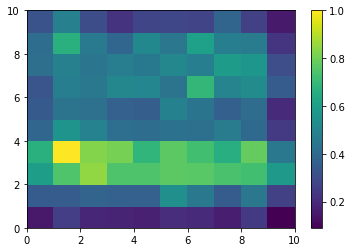

In [11]:
from matplotlib.pylab import pcolor, colorbar, plot, plt
pcolor(som.distance_map().T)
# MID - mean inter neuron distance
colorbar()

### Regiões de ativação (classe)

In [12]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']
y[y == 'Iris-setosa'] = 0
y[y == 'Iris-versicolor'] = 1,
y[y == 'Iris-virginica'] = 2

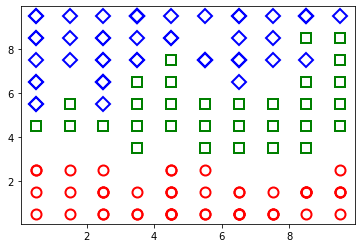

In [13]:
for i, x in enumerate(X):
    #print(y[i])
    #print(x)
    w = som.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[y[i]], markeredgewidth = 2)

In [14]:
w = som.winner(X[148])  #Características do vinho da 3 linha do dataset ativa o neurônio representado pelos índices de w
print(w)

(5, 7)


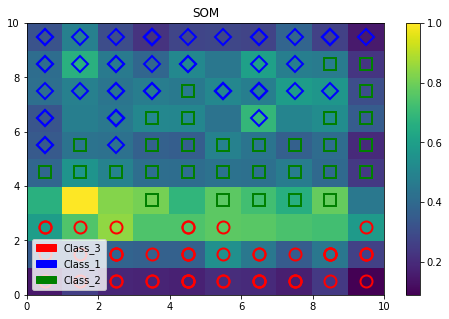

In [15]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Class_3')
blue_patch = mpatches.Patch(color='blue', label='Class_1')
green_patch = mpatches.Patch(color='green', label='Class_2')


plt.figure(figsize=(8,5))
plt.title('SOM')
plt.pcolor(som.distance_map().T) # distance map as background
plt.colorbar()

for cnt,xx in enumerate(X):
    w = som.winner(xx) # getting the winner
    plt.plot(w[0]+.5,w[1]+.5,markers[y[cnt]],markerfacecolor='None',
             markeredgecolor=color[y[cnt]],markersize=12,markeredgewidth=2)
    
plt.axis([0,som.get_weights().shape[0],0,som.get_weights().shape[1]])
plt.legend(handles=[red_patch, blue_patch,green_patch])
plt.show() # show the figure